# MLP
Cell line 13 K562

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was a learn fail during CV.

MCC mean 0.1325

In [ ]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 14:25:39.800022


In [ ]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Mounted at /content/drive/
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [ ]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [ ]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [ ]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=13]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14]


2023-04-29 14:25:59.233359
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 1040
Num RCI: 1040
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 1040 sequences.

Training # 1 1
2023-04-29 14:26:03.758059
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [-0.11547846836151131, -2.621342665613036]
Variances [1.32652825 1.59166902]
Priors [0.65563722 0.34436278]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 571:260 68.71%
Computed class weights: {0: 1.5980769230769232, 1: 0.7276707530647986}
Valid 1:0 136:73 65.07%
FIT


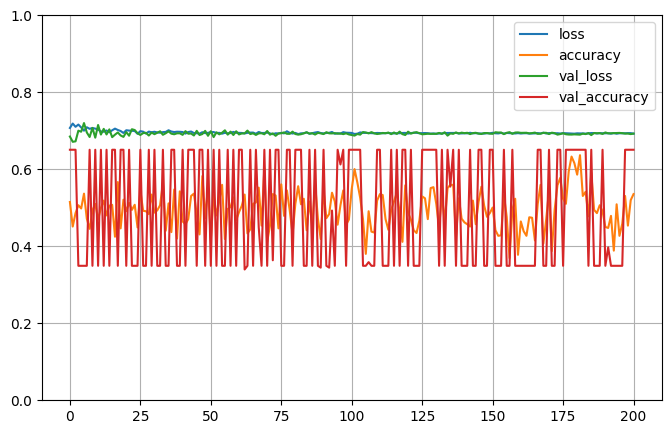


Testing # 1 1
2023-04-29 14:26:47.341730
PREDICT
Test 1:0 136:73 65.07%
Predict 1:0 209:0 100.00%
Test sizes (209, 1025) (209,)
Distrib of scores: 0.50723904 mean 8.8583474e-05 std
Range of scores: 0.5071031 to 0.50758266
Score threshold 0.5
Confusion matrix
 [[  0  73]
 [  0 136]]
Normalized matrix
 [[0.        0.3492823]
 [0.        0.6507177]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


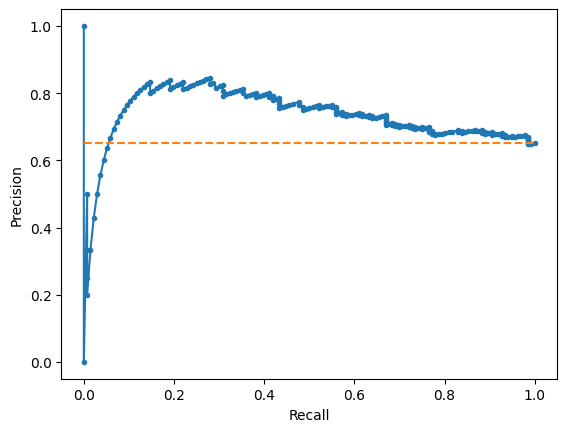

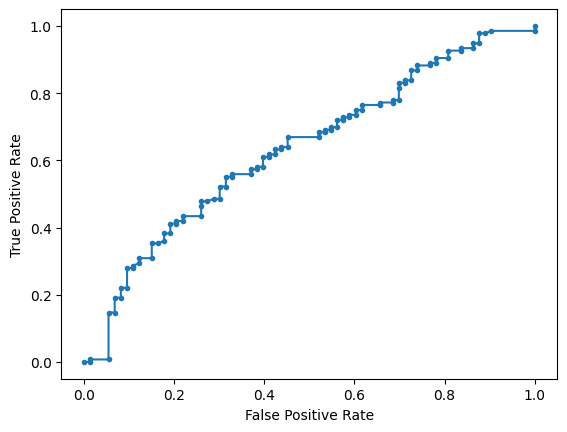

Accuracy: 65.07% Precision: 65.07% Recall: 100.00%
F1: 78.84% MCC: 0.0000
AUPRC: 73.09% AUROC: 63.48%
 accuracy [65.07177033492823]
 precision [65.07177033492823]
 recall [100.0]
 F1 [78.84057971014494]
 MCC [0.0]
 AUPRC [73.0865133017757]
 AUROC [63.477034649476224]

Training # 1 2
2023-04-29 14:26:47.946226
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [-2.526928428045469, -0.17168183750528074]
Variances [1.75903249 1.39924843]
Priors [0.34435105 0.65564895]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 581:253 69.66%
Computed class weights: {0: 1.6482213438735178, 1: 0.7177280550774526}
Valid 1:0 136:70 66.02%
FIT


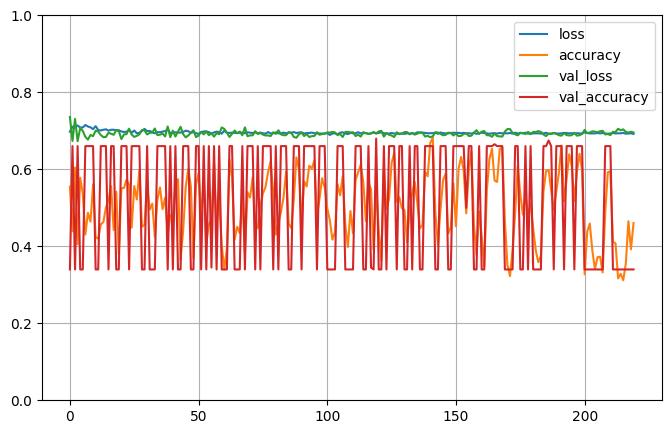


Testing # 1 2
2023-04-29 14:27:31.197991
PREDICT
Test 1:0 136:70 66.02%
Predict 1:0 202:4 98.06%
Test sizes (206, 1025) (206,)
Distrib of scores: 0.50033057 mean 0.0001263781 std
Range of scores: 0.49989766 to 0.5007533
Score threshold 0.5
Confusion matrix
 [[  4  66]
 [  0 136]]
Normalized matrix
 [[0.01941748 0.32038835]
 [0.         0.66019417]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


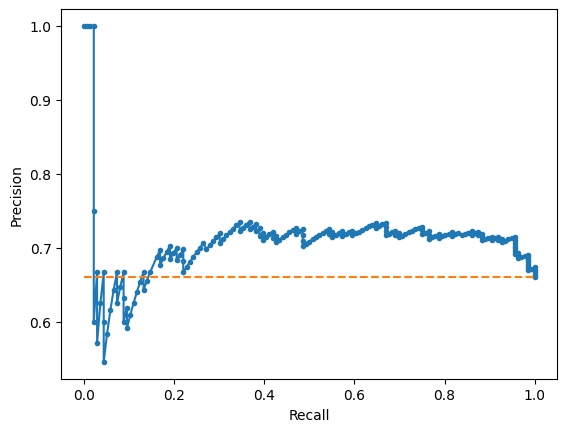

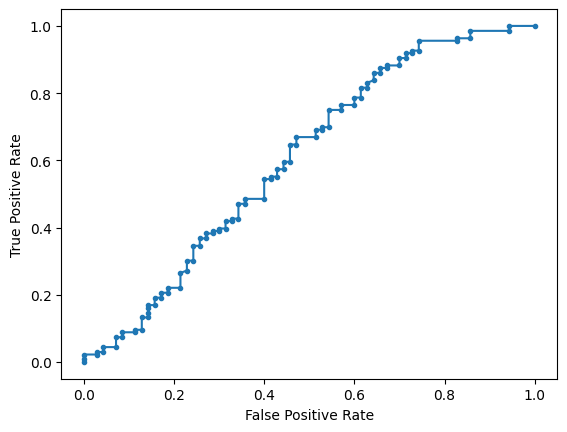

Accuracy: 67.96% Precision: 67.33% Recall: 100.00%
F1: 80.47% MCC: 0.1961
AUPRC: 70.84% AUROC: 60.67%
 accuracy [67.96116504854369]
 precision [67.32673267326733]
 recall [100.0]
 F1 [80.4733727810651]
 MCC [0.19614387237545422]
 AUPRC [70.84387542696777]
 AUROC [60.67226890756302]

Training # 1 3
2023-04-29 14:27:31.923453
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [-0.14417190881621886, -2.532566657519636]
Variances [1.45704052 1.68190262]
Priors [0.64859791 0.35140209]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 563:271 67.51%
Computed class weights: {0: 1.5387453874538746, 1: 0.7406749555950266}
Valid 1:0 145:61 70.39%
FIT


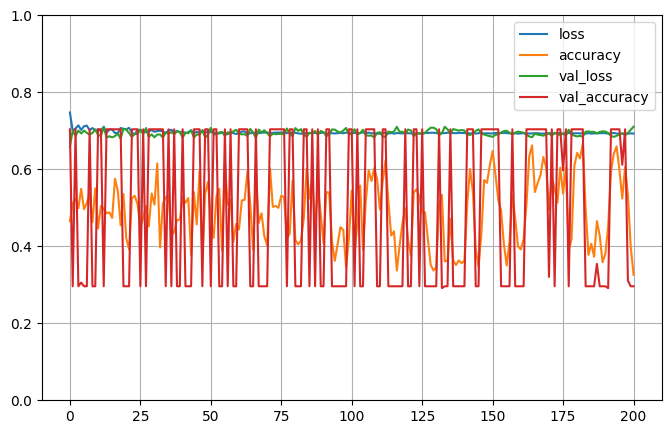


Testing # 1 3
2023-04-29 14:28:15.690183
PREDICT
Test 1:0 145:61 70.39%
Predict 1:0 206:0 100.00%
Test sizes (206, 1025) (206,)
Distrib of scores: 0.50076973 mean 0.00011882256 std
Range of scores: 0.5004456 to 0.5012318
Score threshold 0.5
Confusion matrix
 [[  0  61]
 [  0 145]]
Normalized matrix
 [[0.        0.2961165]
 [0.        0.7038835]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


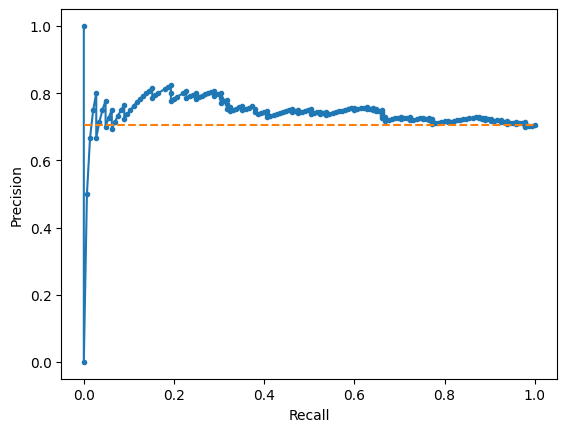

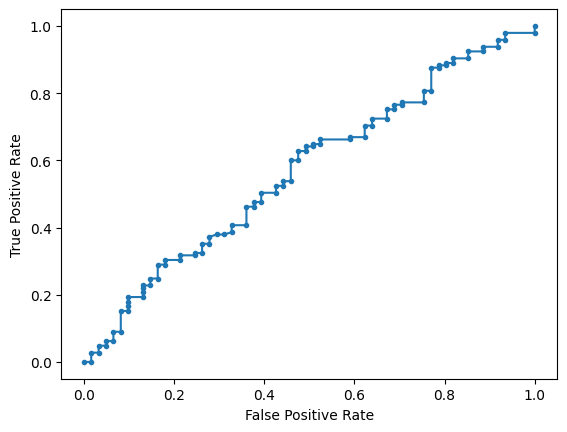

Accuracy: 70.39% Precision: 70.39% Recall: 100.00%
F1: 82.62% MCC: 0.0000
AUPRC: 74.16% AUROC: 56.98%
 accuracy [70.3883495145631]
 precision [70.3883495145631]
 recall [100.0]
 F1 [82.62108262108264]
 MCC [0.0]
 AUPRC [74.15920047197116]
 AUROC [56.98134539287734]

Training # 1 4
2023-04-29 14:28:16.255755
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [-0.15142356625579884, -2.4908915264847575]
Variances [1.3589999  1.65332951]
Priors [0.6356376 0.3643624]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 547:279 66.22%
Computed class weights: {0: 1.4802867383512546, 1: 0.7550274223034735}
Valid 1:0 149:65 69.63%
FIT


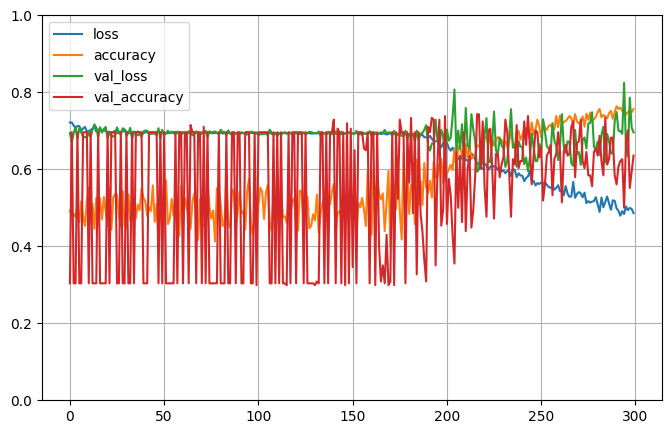


Testing # 1 4
2023-04-29 14:29:06.560914
PREDICT
Test 1:0 149:65 69.63%
Predict 1:0 127:87 59.35%
Test sizes (214, 1025) (214,)
Distrib of scores: 0.5473015 mean 0.2471726 std
Range of scores: 0.03301987 to 0.99000585
Score threshold 0.5
Confusion matrix
 [[37 28]
 [50 99]]
Normalized matrix
 [[0.1728972  0.13084112]
 [0.23364486 0.46261682]]
Extreme scores correct, pos:neg 65 26
Extreme scores incorrect pos:neg 19 25


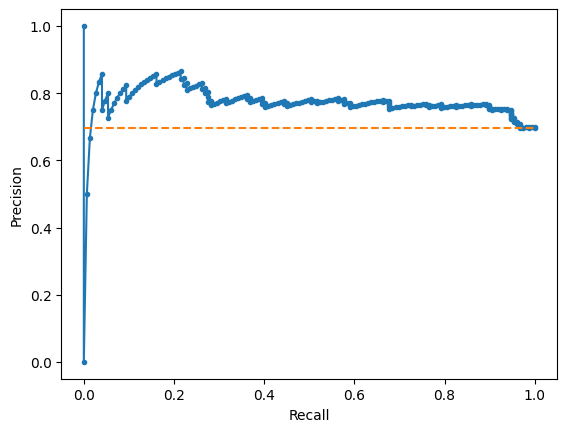

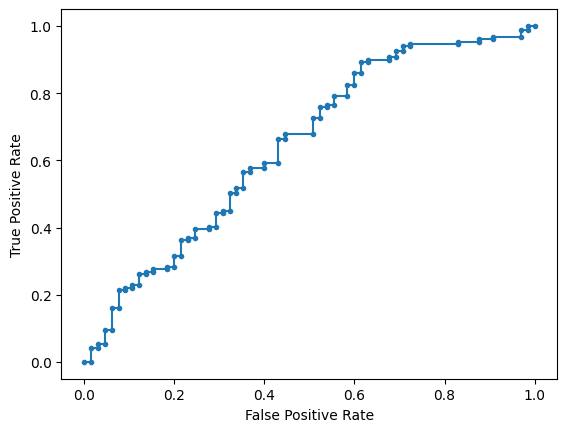

Accuracy: 63.55% Precision: 77.95% Recall: 66.44%
F1: 71.74% MCC: 0.2188
AUPRC: 77.28% AUROC: 64.52%
 accuracy [63.55140186915887]
 precision [77.95275590551181]
 recall [66.44295302013423]
 F1 [71.73913043478262]
 MCC [0.21876268981511082]
 AUPRC [77.28071633654639]
 AUROC [64.52245740836345]

Training # 1 5
2023-04-29 14:29:07.131586
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [-0.171974080601742, -2.533050728343426]
Variances [1.42205201 1.74845277]
Priors [0.6407266 0.3592734]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 566:269 67.78%
Computed class weights: {0: 1.5520446096654275, 1: 0.7376325088339223}
Valid 1:0 142:63 69.27%
FIT


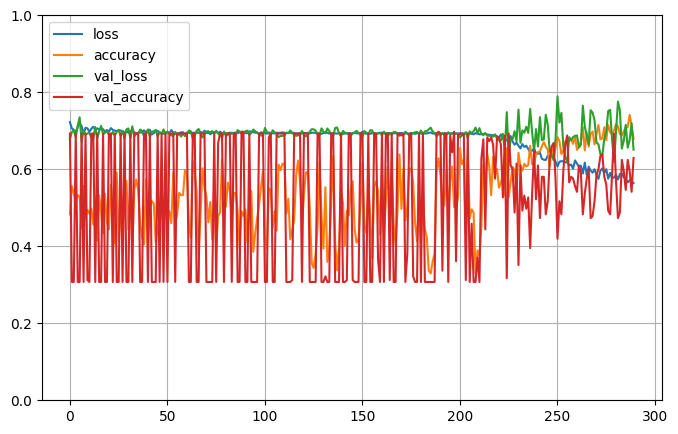


Testing # 1 5
2023-04-29 14:30:31.255140
PREDICT
Test 1:0 142:63 69.27%
Predict 1:0 198:7 96.59%
Test sizes (205, 1025) (205,)
Distrib of scores: 0.5017458 mean 0.000927776 std
Range of scores: 0.49925122 to 0.50487924
Score threshold 0.5
Confusion matrix
 [[  4  59]
 [  3 139]]
Normalized matrix
 [[0.0195122  0.28780488]
 [0.01463415 0.67804878]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


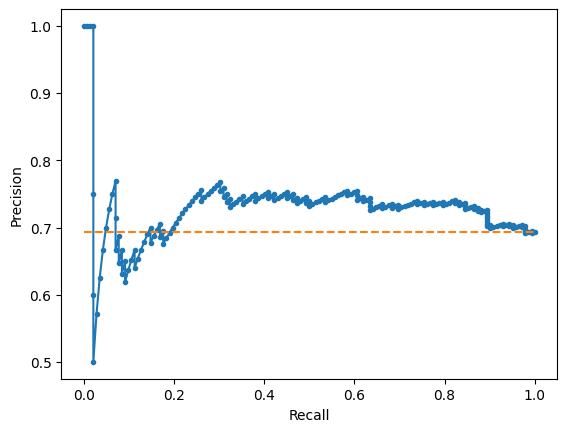

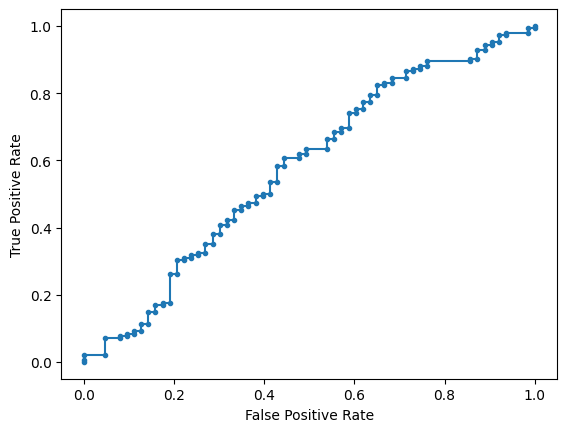

Accuracy: 69.76% Precision: 70.20% Recall: 97.89%
F1: 81.76% MCC: 0.1076
AUPRC: 72.86% AUROC: 57.84%
 accuracy [69.7560975609756]
 precision [70.2020202020202]
 recall [97.88732394366197]
 F1 [81.76470588235294]
 MCC [0.10763243062680575]
 AUPRC [72.85833748370494]
 AUROC [57.835904314777565]

Training # 2 1
2023-04-29 14:30:31.881070
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [-2.5043048243832993, -0.13819354483722376]
Variances [1.62470452 1.36395465]
Priors [0.35242065 0.64757935]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 557:269 67.43%
Computed class weights: {0: 1.5353159851301115, 1: 0.7414721723518851}
Valid 1:0 141:73 65.89%
FIT


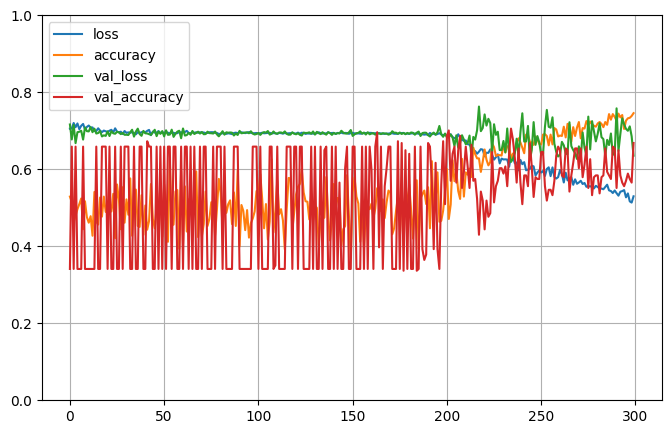


Testing # 2 1
2023-04-29 14:31:25.199267
PREDICT
Test 1:0 141:73 65.89%
Predict 1:0 136:78 63.55%
Test sizes (214, 1025) (214,)
Distrib of scores: 0.5840973 mean 0.22880158 std
Range of scores: 0.1162739 to 0.984102
Score threshold 0.5
Confusion matrix
 [[ 40  33]
 [ 38 103]]
Normalized matrix
 [[0.18691589 0.15420561]
 [0.17757009 0.48130841]]
Extreme scores correct, pos:neg 71 26
Extreme scores incorrect pos:neg 23 16


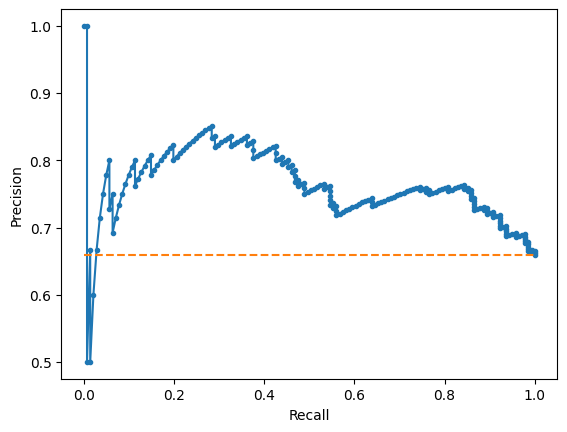

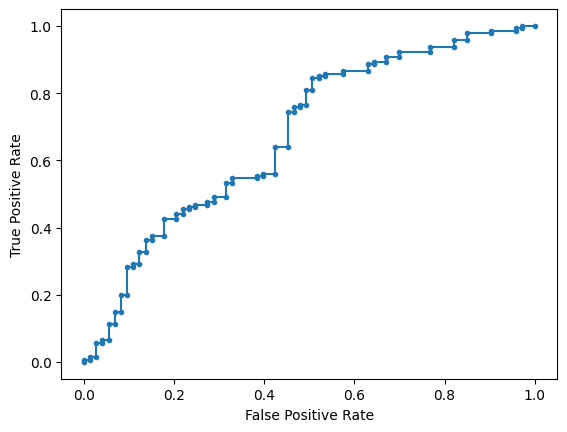

Accuracy: 66.82% Precision: 75.74% Recall: 73.05%
F1: 74.37% MCC: 0.2743
AUPRC: 76.41% AUROC: 67.53%
 accuracy [66.82242990654206]
 precision [75.73529411764706]
 recall [73.04964539007092]
 F1 [74.36823104693141]
 MCC [0.2742764022867985]
 AUPRC [76.40975608002252]
 AUROC [67.53133197318566]

Training # 2 2
2023-04-29 14:31:25.768362
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [-2.4738560426104015, -0.12640903507713241]
Variances [1.57864874 1.28482132]
Priors [0.37405551 0.62594449]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 555:291 65.60%
Computed class weights: {0: 1.4536082474226804, 1: 0.7621621621621621}
Valid 1:0 131:63 67.53%
FIT


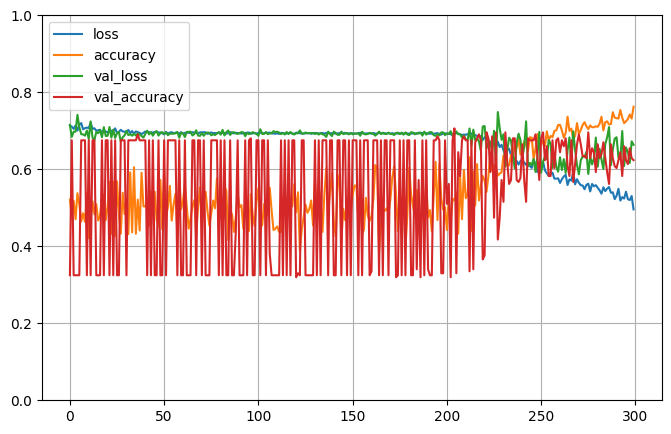


Testing # 2 2
2023-04-29 14:32:49.841605
PREDICT
Test 1:0 131:63 67.53%
Predict 1:0 106:88 54.64%
Test sizes (194, 1025) (194,)
Distrib of scores: 0.5337873 mean 0.23382139 std
Range of scores: 0.046160907 to 0.9792657
Score threshold 0.5
Confusion matrix
 [[39 24]
 [49 82]]
Normalized matrix
 [[0.20103093 0.12371134]
 [0.25257732 0.42268041]]
Extreme scores correct, pos:neg 56 25
Extreme scores incorrect pos:neg 14 25


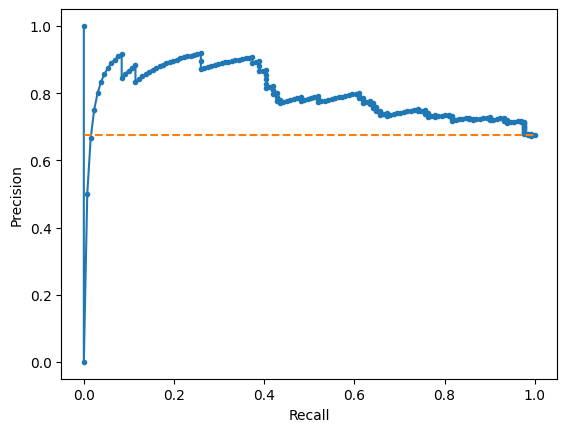

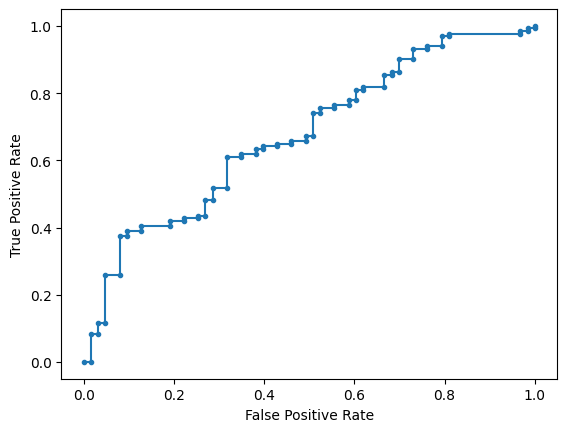

Accuracy: 62.37% Precision: 77.36% Recall: 62.60%
F1: 69.20% MCC: 0.2305
AUPRC: 79.53% AUROC: 67.60%
 accuracy [62.371134020618555]
 precision [77.35849056603774]
 recall [62.59541984732825]
 F1 [69.19831223628692]
 MCC [0.2304522538822071]
 AUPRC [79.52736185109019]
 AUROC [67.59966072943172]

Training # 2 3
2023-04-29 14:32:50.390913
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [-2.5878694844996466, -0.14216725198439178]
Variances [1.5996297  1.30735964]
Priors [0.35348782 0.64651218]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 554:274 66.91%
Computed class weights: {0: 1.510948905109489, 1: 0.7472924187725631}
Valid 1:0 148:64 69.81%
FIT


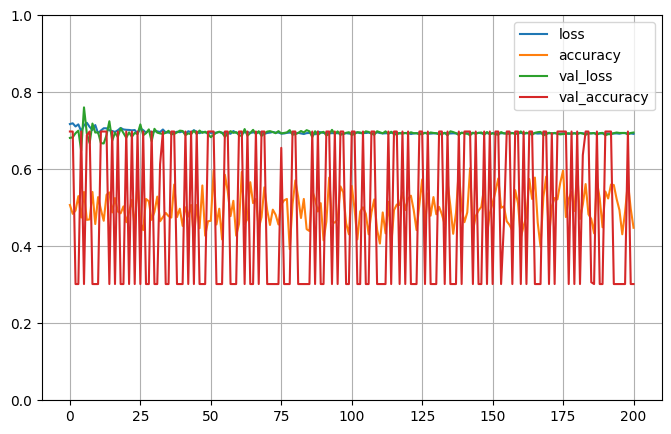


Testing # 2 3
2023-04-29 14:33:28.487092
PREDICT
Test 1:0 148:64 69.81%
Predict 1:0 212:0 100.00%
Test sizes (212, 1025) (212,)
Distrib of scores: 0.5053189 mean 0.0001015252 std
Range of scores: 0.5050368 to 0.50559014
Score threshold 0.5
Confusion matrix
 [[  0  64]
 [  0 148]]
Normalized matrix
 [[0.         0.30188679]
 [0.         0.69811321]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


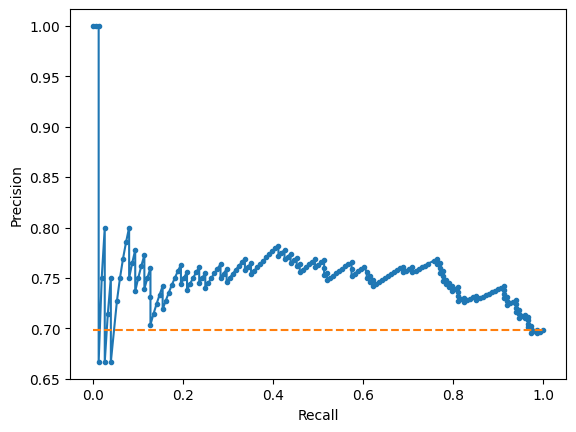

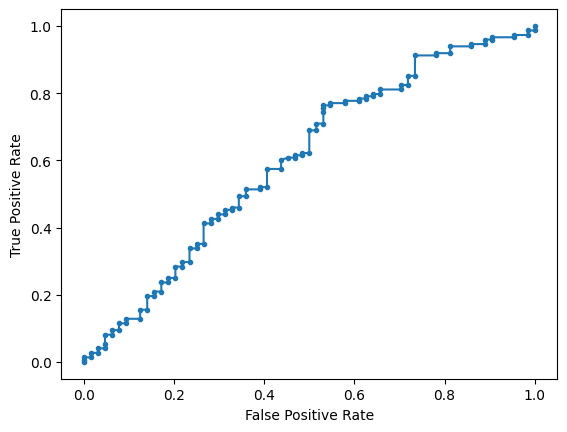

Accuracy: 69.81% Precision: 69.81% Recall: 100.00%
F1: 82.22% MCC: 0.0000
AUPRC: 75.14% AUROC: 60.29%
 accuracy [69.81132075471697]
 precision [69.81132075471697]
 recall [100.0]
 F1 [82.22222222222221]
 MCC [0.0]
 AUPRC [75.14239754978]
 AUROC [60.2882179054054]

Training # 2 4
2023-04-29 14:33:29.086868
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [-2.575723290375227, -0.15026951320821755]
Variances [1.77859802 1.49265799]
Priors [0.35132951 0.64867049]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 566:259 68.61%
Computed class weights: {0: 1.5926640926640927, 1: 0.7287985865724381}
Valid 1:0 149:66 69.30%
FIT


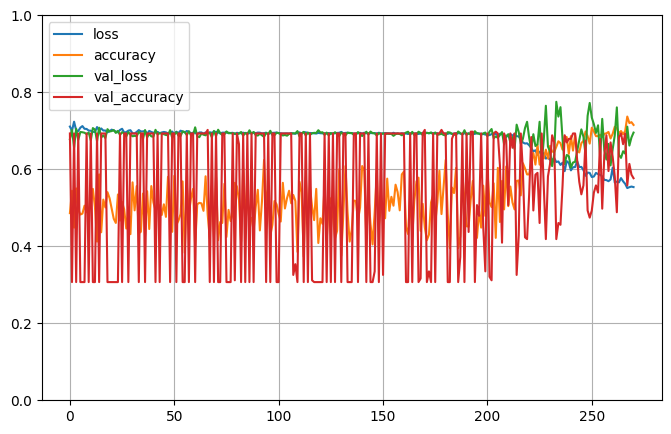


Testing # 2 4
2023-04-29 14:34:53.303599
PREDICT
Test 1:0 149:66 69.30%
Predict 1:0 185:30 86.05%
Test sizes (215, 1025) (215,)
Distrib of scores: 0.5005779 mean 0.0005143682 std
Range of scores: 0.49948487 to 0.5026536
Score threshold 0.5
Confusion matrix
 [[ 16  50]
 [ 14 135]]
Normalized matrix
 [[0.0744186  0.23255814]
 [0.06511628 0.62790698]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


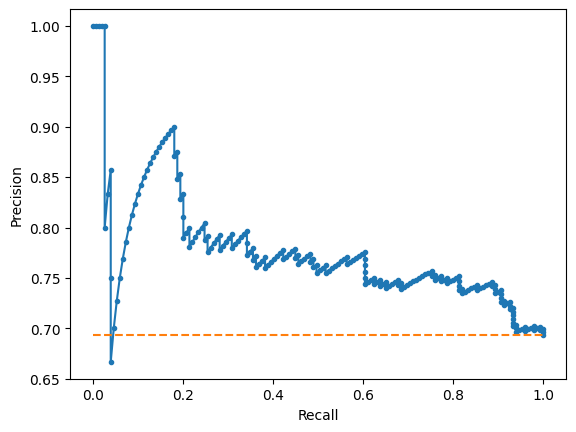

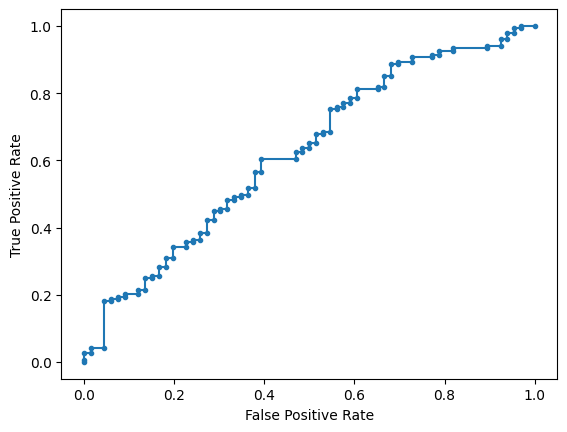

Accuracy: 70.23% Precision: 72.97% Recall: 90.60%
F1: 80.84% MCC: 0.1976
AUPRC: 77.53% AUROC: 62.34%
 accuracy [70.23255813953489]
 precision [72.97297297297297]
 recall [90.60402684563759]
 F1 [80.8383233532934]
 MCC [0.19762471755429506]
 AUPRC [77.5339129495623]
 AUROC [62.34492576774456]

Training # 2 5
2023-04-29 14:34:54.107710
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [-2.519203415128645, -0.16785790357718725]
Variances [1.88517611 1.48662679]
Priors [0.34660561 0.65339439]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 582:253 69.70%
Computed class weights: {0: 1.650197628458498, 1: 0.7173539518900344}
Valid 1:0 138:67 67.32%
FIT


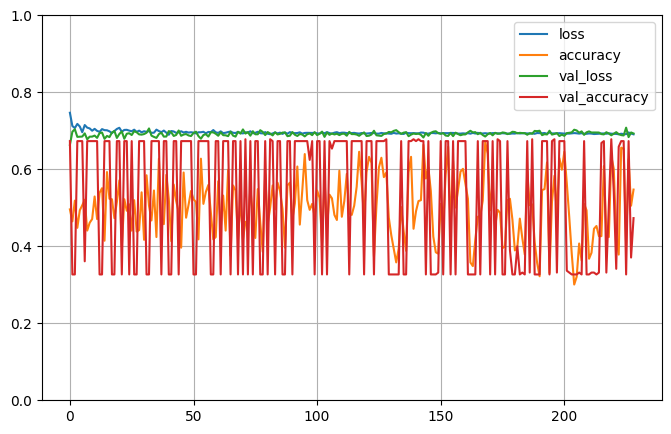


Testing # 2 5
2023-04-29 14:35:35.414362
PREDICT
Test 1:0 138:67 67.32%
Predict 1:0 204:1 99.51%
Test sizes (205, 1025) (205,)
Distrib of scores: 0.5005034 mean 0.0001751048 std
Range of scores: 0.49979788 to 0.5012091
Score threshold 0.5
Confusion matrix
 [[  1  66]
 [  0 138]]
Normalized matrix
 [[0.00487805 0.32195122]
 [0.         0.67317073]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


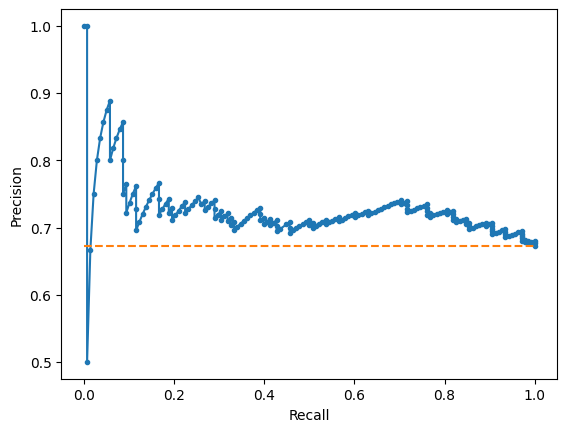

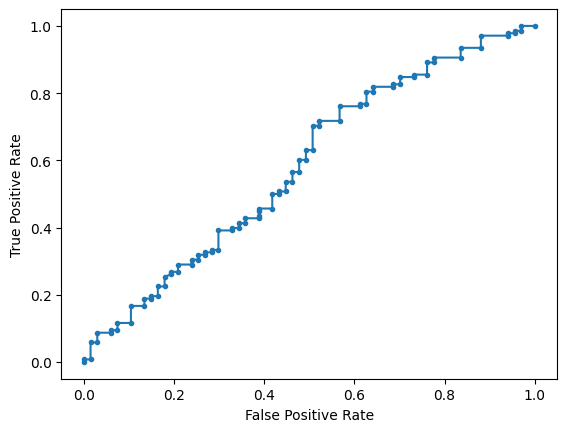

Accuracy: 67.80% Precision: 67.65% Recall: 100.00%
F1: 80.70% MCC: 0.1005
AUPRC: 72.52% AUROC: 58.45%
 accuracy [67.8048780487805]
 precision [67.64705882352942]
 recall [100.0]
 F1 [80.70175438596492]
 MCC [0.10048171945090491]
 AUPRC [72.51978587211238]
 AUROC [58.45230369889683]
2023-04-29 14:35:36.180104


In [ ]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [ ]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 67.38% std 2.88
 precision mean 71.45% std 4.41
 recall mean 89.06% std 15.45
 F1 mean 78.28% std 4.77
 MCC mean 0.1325 std 0.1053
 AUPRC mean 74.94% std 2.72
 AUROC mean 61.97% std 3.81
 accuracy [[65.07177033492823], [67.96116504854369], [70.3883495145631], [63.55140186915887], [69.7560975609756], [66.82242990654206], [62.371134020618555], [69.81132075471697], [70.23255813953489], [67.8048780487805]]
 precision [[65.07177033492823], [67.32673267326733], [70.3883495145631], [77.95275590551181], [70.2020202020202], [75.73529411764706], [77.35849056603774], [69.81132075471697], [72.97297297297297], [67.64705882352942]]
 recall [[100.0], [100.0], [100.0], [66.44295302013423], [97.88732394366197], [73.04964539007092], [62.59541984732825], [100.0], [90.60402684563759], [100.0]]
 F1 [[78.84057971014494], [80.4733727810651], [82.62108262108264], [71.73913043478262], [81.76470588235294], [74.36823104693141], [69.19831223628692], [82.22222222222221], [80.8383233532934], [80.7017